## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING DATA

In [2]:
data=pd.read_csv(r'C:\Users\user\Downloads\Projet.csv',encoding='utf-8',sep=',')

In [3]:
data

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


## EXPLORATION DATA 

In [4]:
data.shape

(1000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [6]:
data.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [7]:
data.parent_age

0      56
1      57
2      50
3      49
4      57
       ..
995    49
996    51
997    49
998    53
999    50
Name: parent_age, Length: 1000, dtype: int64

In [8]:
data.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

In [9]:
data['interest'].value_counts()

Very Interested     324
Uncertain           261
Less Interested     229
Quiet Interested    100
Not Interested       86
Name: interest, dtype: int64

In [10]:
data['residence'].value_counts()

Urban    539
Rural    461
Name: residence, dtype: int64

In [11]:
data.loc[:,['residence','parent_salary']].groupby(['residence']).min()

,parent_salary
residence,
Rural,2570000
Urban,1000000


In [12]:
data.loc[:,['residence','parent_salary']].groupby(['residence']).max()

,parent_salary
residence,
Rural,9110000
Urban,10000000


In [13]:
data.loc[:,['residence','parent_salary']].groupby(['residence']).sum()

,parent_salary
residence,
Rural,2688050000
Urban,2693520000


In [14]:
data.loc[:,['residence','parent_salary']].groupby(['residence']).count()

,parent_salary
residence,
Rural,461
Urban,539


In [15]:
data.loc[:,['residence','interest']].groupby(['interest']).max()

,residence
interest,
Less Interested,Urban
Not Interested,Urban
Quiet Interested,Urban
Uncertain,Urban
Very Interested,Urban


In [16]:
data.loc[:,['residence','interest']].groupby(['interest']).min()

,residence
interest,
Less Interested,Rural
Not Interested,Rural
Quiet Interested,Rural
Uncertain,Rural
Very Interested,Rural


In [17]:
data.loc[:,['residence','interest','gender']].groupby(['residence','interest']).count()

gender
residence interest                
Rural     Less Interested       58
          Not Interested        70
          Quiet Interested       8
          Uncertain            185
          Very Interested      140
Urban     Less Interested      171
          Not Interested        16
          Quiet Interested      92
          Uncertain             76
          Very Interested      184

In [18]:
data.loc[:,['residence','interest','gender']].groupby(['gender','interest']).count().rename(columns={'residence':'Number'})

Number
gender interest                
Female Less Interested      130
       Not Interested        41
       Quiet Interested      34
       Uncertain            120
       Very Interested      160
Male   Less Interested       99
       Not Interested        45
       Quiet Interested      66
       Uncertain            141
       Very Interested      164

In [19]:
data.loc[:,['interest','gender']].rename(columns={'gender':'Genre'}).groupby(['Genre']).count().rename(columns={'interest':'Number'})

,Number
Genre,
Female,485
Male,515


In [20]:
data.loc[:,['residence','parent_was_in_college','gender']].groupby(['residence','parent_was_in_college']).count().rename(columns={'gender':'Number'})

Number
residence parent_was_in_college        
Rural     False                      67
          True                      394
Urban     False                     413
          True                      126

In [21]:
data.query('parent_salary==7000000  & residence=="Rural"')

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
750,Academic,B,Female,Uncertain,Rural,50,7000000,82.7,89.66,True,True


In [22]:
d=data.loc[:,'parent_salary']

In [23]:
d

0      6950000
1      4410000
2      6500000
3      6600000
4      5250000
        ...   
995    7420000
996    7480000
997    5550000
998    5840000
999    2940000
Name: parent_salary, Length: 1000, dtype: int64

In [24]:
data.loc[:,['parent_salary']]

,parent_salary
0,6950000
1,4410000
2,6500000
3,6600000
4,5250000
...,...
995,7420000
996,7480000
997,5550000
998,5840000


In [25]:
data.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

In [26]:
data.drop(columns=['house_area'])

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,87.18,True,True


In [70]:
data.iloc[1:11,0:2]

,type_school,school_accreditation
1,Academic,A
2,Academic,B
3,Vocational,B
4,Academic,A
5,Vocational,B
6,Academic,A
7,Academic,B
8,Academic,B
9,Academic,B
10,Vocational,A


In [28]:
data.loc[[1,2,10],['type_school','school_accreditation']]

,type_school,school_accreditation
1,Academic,A
2,Academic,B
10,Vocational,A


In [29]:
data.type_school.unique()

array(['Academic', 'Vocational'], dtype=object)

In [32]:
data.describe(include='all')

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
count,1000,1000,1000,1000,1000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000,1000
unique,2,2,2,5,2,NaN,NaN,NaN,NaN,2,2
top,Academic,B,Male,Very Interested,Urban,NaN,NaN,NaN,NaN,True,True
freq,609,519,515,324,539,NaN,NaN,NaN,NaN,520,500
mean,NaN,NaN,NaN,NaN,NaN,52.208000,5.381570e+06,74.515300,86.097200,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.500427,1.397546e+06,15.293346,3.378738,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,40.000000,1.000000e+06,20.000000,75.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,50.000000,4.360000e+06,64.600000,83.737500,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,52.000000,5.440000e+06,75.500000,85.575000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,54.000000,6.382500e+06,84.825000,88.262500,NaN,NaN


In [33]:
data[["gender"]]

,gender
0,Male
1,Male
2,Female
3,Male
4,Female
...,...
995,Female
996,Female
997,Male
998,Male


## DATA VISUALIZATION

<AxesSubplot:xlabel='type_school', ylabel='Count'>

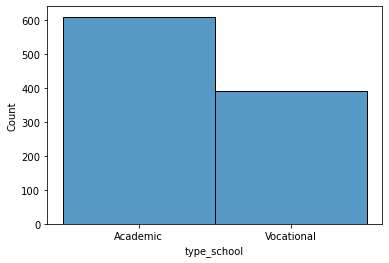

In [43]:
sns.histplot(data, x=data["type_school"],stat="count")

<AxesSubplot:xlabel='residence', ylabel='Count'>

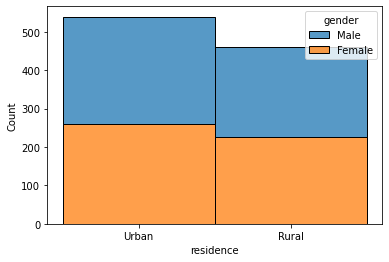

In [71]:
sns.histplot(data,x=data["residence"],hue=data["gender"],multiple="stack")

<AxesSubplot:xlabel='residence', ylabel='Count'>

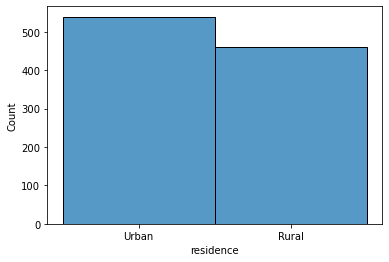

In [59]:
sns.histplot(data,x=data["residence"])

In [ ]:
sns.